In [2]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from sklearn import linear_model
clf = linear_model.LinearRegression()
from scipy.stats import pearsonr
import statsmodels.api as sm
import pysal.lib as ps
from mgwr.gwr import GWR
from mgwr.sel_bw import Sel_BW
from scipy.linalg import toeplitz
import multiprocessing as mp
import time

In [3]:
ds = xr.open_dataset('./alaska_data/EOF/olsdata.nc')
temp = ds.temp.values
prcp = ds.prcp.values
vpd = ds.vpd.values
lat = ds.lat.values
lon = ds.lon.values
ds.close()
ds = xr.open_dataset('./alaska_data/EOF/NIRPeak.nc')
nir = ds.Peak.values
ds.close()
ds = xr.open_dataset('./alaska_data/EOF/mask.nc')
mm = ds.mask.values
ds.close()
nir = np.where(mm, np.nan, nir[:,::-1].T)

In [23]:
x = 1291
y = 2801

temp_tt = np.reshape(temp, (x*y), order='F')
temp_tt = np.ma.masked_array(temp_tt, np.isnan(temp_tt))
ocean = temp_tt.mask
land = ~ocean
temp_tt = temp_tt[land]

prcp_tt = np.reshape(prcp, (x*y), order='F')
prcp_tt = np.ma.masked_array(prcp_tt, np.isnan(prcp_tt))
ocean = prcp_tt.mask
land = ~ocean
prcp_tt = prcp_tt[land]

vpd_tt = np.reshape(vpd, (x*y), order='F')
vpd_tt = np.ma.masked_array(vpd_tt, np.isnan(vpd_tt))
ocean = vpd_tt.mask
land = ~ocean
vpd_tt = vpd_tt[land]

nir_tt = np.reshape(nir, (x*y), order='F')
nir_tt = np.ma.masked_array(nir_tt, np.isnan(nir_tt))
ocean = nir_tt.mask
land = ~ocean
nir_tt = nir_tt[land]

In [28]:
# X = np.concatenate((temp_tt.reshape((len(temp_tt),1)), prcp_tt.reshape((len(prcp_tt),1)), vpd_tt.reshape((len(vpd_tt),1))), axis=1)
X = np.concatenate((temp_tt.reshape((len(temp_tt),1)), prcp_tt.reshape((len(prcp_tt),1))), axis=1)
mod = sm.OLS(nir_tt, X)
res = mod.fit()

In [29]:
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.702
Model:                            OLS   Adj. R-squared (uncentered):              0.702
Method:                 Least Squares   F-statistic:                          2.568e+06
Date:                Mon, 09 Dec 2019   Prob (F-statistic):                        0.00
Time:                        16:49:20   Log-Likelihood:                      1.6100e+06
No. Observations:             2178861   AIC:                                 -3.220e+06
Df Residuals:                 2178859   BIC:                                 -3.220e+06
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [7]:
ols_resid = res.resid
resid = np.ones(x*y) * -999.
resid[land] = ols_resid[:]
resid = np.ma.masked_values(np.reshape(resid, (x, y), order='F'), -999.)

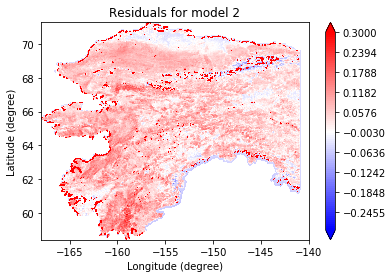

In [9]:
plt.contourf(lon,lat,resid, cmap=plt.cm.bwr, levels=np.linspace(-.3,.3,100),extend='both')
plt.colorbar()
plt.xlabel('Longitude (degree)')
plt.ylabel('Latitude (degree)')
plt.title('Residuals for model 2')
plt.savefig('./plot/resid2_tp.png')

In [7]:
# lon = np.arange(-168, -139.99, 0.01)
# lat = np.arange(58.39, 71.3, 0.01)
# lon, lat = np.meshgrid(lon,lat)
# x = 1291
# y = 2801

# lon_tt = np.reshape(lon, (x*y), order='F')
# lon_tt = np.ma.masked_array(lon_tt, mm)
# ocean = lon_tt.mask
# land = ~ocean
# lon_tt = lon_tt[land]

# lat_tt = np.reshape(lat, (x*y), order='F')
# lat_tt = np.ma.masked_array(lat_tt, mm)
# ocean = lat_tt.mask
# land = ~ocean
# lat_tt = lat_tt[land]

# coords = list(zip(lon_tt, lat_tt))
# y = np.array(nir_tt.reshape((-1,1)))

In [20]:
# model = GWR(coords, y, np.array(X), bw=0.05, fixed=False, kernel='bisquare')

In [ ]:
# results = model.fit()
# np.save('gwr_results.npy',results.params)

In [4]:
mm1 = mm[::10,::10]

lon = np.arange(-168, -139.99, 0.1)
lat = np.arange(58.39, 71.3, 0.1)
lon, lat = np.meshgrid(lon,lat)
x = 130
y = 281

lon_tt = np.reshape(lon, (x*y), order='F')
lon_tt = np.ma.masked_array(lon_tt, mm1)
ocean = lon_tt.mask
land = ~ocean
lon_tt = lon_tt[land]

lat_tt = np.reshape(lat, (x*y), order='F')
lat_tt = np.ma.masked_array(lat_tt, mm1)
ocean = lat_tt.mask
land = ~ocean
lat_tt = lat_tt[land]

coords = list(zip(lon_tt, lat_tt))

In [5]:
x = 130
y = 281

temp_tt = np.reshape(temp[::10,::10], (x*y), order='F')
temp_tt = np.ma.masked_array(temp_tt, np.isnan(temp_tt))
ocean = temp_tt.mask
land = ~ocean
temp_tt = temp_tt[land]

prcp_tt = np.reshape(prcp[::10,::10], (x*y), order='F')
prcp_tt = np.ma.masked_array(prcp_tt, np.isnan(prcp_tt))
ocean = prcp_tt.mask
land = ~ocean
prcp_tt = prcp_tt[land]

vpd_tt = np.reshape(vpd[::10,::10], (x*y), order='F')
vpd_tt = np.ma.masked_array(vpd_tt, np.isnan(vpd_tt))
ocean = vpd_tt.mask
land = ~ocean
vpd_tt = vpd_tt[land]

nir_tt = np.reshape(nir[::10,::10], (x*y), order='F')
nir_tt = np.ma.masked_array(nir_tt, np.isnan(nir_tt))
ocean = nir_tt.mask
land = ~ocean
nir_tt = nir_tt[land]

In [6]:
X = np.concatenate((temp_tt.reshape((len(temp_tt),1)), prcp_tt.reshape((len(prcp_tt),1))), axis=1)
Y = np.array(nir_tt.reshape((-1,1)))
# X = (X - X.mean(axis=0)) / X.std(axis=0)
# Y = (Y - Y.mean(axis=0)) / Y.std(axis=0)
# bw = Sel_BW(coords, Y, np.array(X)).search(bw_min=.2) #AICc: 1016.0  bw_min=.2: 1106.0

In [60]:
# model = GWR(coords, Y, np.array(X), bw=bw, fixed=False, kernel='gaussian')
# results = model.fit()

In [16]:
n_proc = 10 #10 processors
pool = mp.Pool(n_proc)

/home/mmfire/anaconda3/lib/python3.6/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=1.03745e-16): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/mmfire/anaconda3/lib/python3.6/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=2.80806e-22): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)


In [28]:
# X : temp and vpd
%%time
gwr_selector = Sel_BW(coords, Y, np.array(X),spherical=True, fixed=True)
gwr_bw = gwr_selector.search(pool=pool) #add pool to Sel_BW.search
print(gwr_bw)

58.86
CPU times: user 17.9 s, sys: 5.54 s, total: 23.5 s
Wall time: 41min 44s


In [20]:
# X : temp and prcp
# %%time
gwr_selector = Sel_BW(coords, Y, np.array(X),spherical=True, fixed=True)
gwr_bw = gwr_selector.search(pool=pool) #add pool to Sel_BW.search
print(gwr_bw)

58.86


In [10]:
%%time
gwr_results = GWR(coords, Y, np.array(X), 58.86,spherical=True, fixed=True).fit(pool=pool)
print(gwr_results.summary())

Model type                                                         Gaussian
Number of observations:                                               21824
Number of covariates:                                                     3

Global Regression Results
---------------------------------------------------------------------------
Residual sum of squares:                                          21560.923
Log-likelihood:                                                  -30834.577
AIC:                                                              61675.154
AICc:                                                             61677.156
BIC:                                                            -196447.572
R2:                                                                   0.012
Adj. R2:                                                              0.012

Variable                              Est.         SE  t(Est/SE)    p-value
------------------------------- ---------- ---------- ------

In [8]:
# OLS
X = np.concatenate((temp_tt.reshape((len(temp_tt),1)), prcp_tt.reshape((len(prcp_tt),1))), axis=1)
mod = sm.OLS(nir_tt, X)
res = mod.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.726
Model:                            OLS   Adj. R-squared (uncentered):              0.726
Method:                 Least Squares   F-statistic:                          2.892e+04
Date:                Mon, 09 Dec 2019   Prob (F-statistic):                        0.00
Time:                        17:07:50   Log-Likelihood:                          17430.
No. Observations:               21824   AIC:                                 -3.486e+04
Df Residuals:                   21822   BIC:                                 -3.484e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

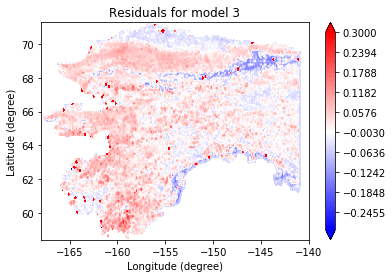

In [11]:
ols_resid = res.resid
resid = np.ones(x*y) * -999.
resid[land] = ols_resid[:]
resid = np.ma.masked_values(np.reshape(resid, (x, y), order='F'), -999.)

plt.contourf(lon,lat,resid, cmap=plt.cm.bwr, levels=np.linspace(-.3,.3,100),extend='both')
plt.colorbar()
plt.xlabel('Longitude (degree)')
plt.ylabel('Latitude (degree)')
plt.title('Residuals for model 3')
plt.savefig('./plot/resid2_c.png')

In [24]:
# GLS
ols_resid = sm.OLS(Y, np.array(X)).fit().resid
res_fit = sm.OLS(ols_resid[1:], ols_resid[:-1]).fit()
rho = res_fit.params
order = toeplitz(np.arange(21824))
sigma = rho**order

gls_model = sm.GLS(Y, np.array(X), sigma=sigma)
gls_results = gls_model.fit()
gls_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 GLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.683
Model:                            GLS   Adj. R-squared (uncentered):              0.683
Method:                 Least Squares   F-statistic:                          2.348e+04
Date:                Sat, 07 Dec 2019   Prob (F-statistic):                        0.00
Time:                        09:18:10   Log-Likelihood:                          17544.
No. Observations:               21824   AIC:                                 -3.508e+04
Df Residuals:                   21822   BIC:                                 -3.507e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0006   8.97e-06     63.168      0.000       0.001       0.001
x2             0.0489      0.007      6.692      0.000       0.035       0.063
==============================================================================
Omnibus:                    68768.715   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      26935928084.326
Skew:                         -49.567   Prob(JB):                         0.00
Kurtosis:                    5444.672   Cond. No.                     2.54e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.54e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

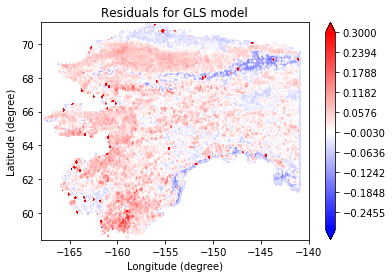

In [26]:
gls_resid = gls_results.resid
resid = np.ones(x*y) * -999.
resid[land] = gls_resid[:]
resid = np.ma.masked_values(np.reshape(resid, (x, y), order='F'), -999.)

plt.contourf(lon,lat,resid, cmap=plt.cm.bwr, levels=np.linspace(-.3,.3,100),extend='both')
plt.colorbar()
plt.xlabel('Longitude (degree)')
plt.ylabel('Latitude (degree)')
plt.title('Residuals for GLS model')
plt.savefig('./plot/gls_resid.png')

Text(0.5, 1.0, 'Maximum values of NIR during growing season')

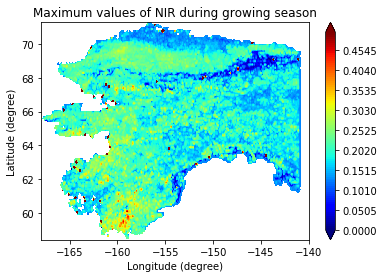

In [20]:
plt.contourf(lon,lat,nir[::10,::10], cmap=plt.cm.jet, levels=np.linspace(0,.5,100),extend='both')
plt.colorbar()
plt.xlabel('Longitude (degree)')
plt.ylabel('Latitude (degree)')
plt.title('Maximum values of NIR during growing season')
plt.savefig('./plot/nir_c.png')